In [1]:
from BCRADataDownloader import BCRADataDownloader
data_folder = BCRADataDownloader("https://cbioportal-datahub.s3.amazonaws.com/brca_tcga_pan_can_atlas_2018.tar.gz").download_data()

In [2]:
import pandas as pd

# Each value of each gen TCGA-XX-XXXX-XX  RSEM (RNA-Seq by Expectation Maximization) represents the relative expresion of the gene

#Rango típico - Significado
#~0.0 - Gen no expresado (o ruido)
#1–10 - Expresión baja
#10–100+ - Expresión moderada a alta
#>500 - Alta expresión (en genes housekeeping o altamente expresados)

genic_expression_file = f'{data_folder}/data_mrna_seq_v2_rsem.txt'
genic_expression_df = pd.read_csv(genic_expression_file, sep='\t')

#Clean and set index as Hugo_Symbol
genic_expression_df = genic_expression_df.loc[genic_expression_df["Hugo_Symbol"].notna()]
genic_expression_df = genic_expression_df.drop_duplicates(subset=["Hugo_Symbol"])
genic_expression_df = genic_expression_df.drop(columns=["Entrez_Gene_Id"]).set_index("Hugo_Symbol")
genic_expression_df = genic_expression_df.T

genic_expression_df.head()

Hugo_Symbol      UBE2Q2P2   HMGB1P1  RNU12-2P   SSX9P     EZHIP  EFCAB8  \
TCGA-3C-AAAU-01   12.9316   52.1503    0.0000  0.0000    1.7233  0.3447   
TCGA-3C-AALI-01   17.3790   69.7553    1.0875  0.5438  144.1000  4.8940   
TCGA-3C-AALJ-01    9.2294  154.2970    0.0000  0.0000    0.0000  2.7199   
TCGA-3C-AALK-01   11.0799  143.8640    0.4137  0.0000    0.0000  2.0687   
TCGA-4H-AAAK-01   14.4298   84.2128    0.4255  0.0000    0.4255  2.9787   

Hugo_Symbol      SRP14P1  TRIM75P  SPATA31B1P  REXO1L6P  ...    ZWILCH  \
TCGA-3C-AAAU-01   4.1359   0.6893         0.0       0.0  ...   415.824   
TCGA-3C-AALI-01   1.6313   0.5438         0.0       0.0  ...  1161.330   
TCGA-3C-AALJ-01   2.7199   0.0000         0.0       0.0  ...   305.422   
TCGA-3C-AALK-01   4.5511   0.0000         0.0       0.0  ...   394.506   
TCGA-4H-AAAK-01   2.9787   0.0000         0.0       0.0  ...   405.711   

Hugo_Symbol         ZWINT      ZXDA      ZXDB      ZXDC    ZYG11A    ZYG11B  \
TCGA-3C-AAAU-01   931.957  129.5920  1007.780  1658.500  258.4940  1208.370   
TCGA-3C-AALI-01   965.198   59.8151   448.613  1343.120  198.4770   603.589   
TCGA-3C-AALJ-01  2531.280   35.3581   533.998   768.812  331.8220   532.185   
TCGA-3C-AALK-01   668.597   55.0269   437.733   863.881  175.4240   607.365   
TCGA-4H-AAAK-01   674.468   48.9362   424.255  1049.790   14.0426   775.745   

Hugo_Symbol          ZYX     ZZEF1      ZZZ3  
TCGA-3C-AAAU-01  3507.25  1894.930  1180.460  
TCGA-3C-AALI-01  5504.62  1318.650   406.743  
TCGA-3C-AALJ-01  5458.75   942.883   509.519  
TCGA-3C-AALK-01  5691.35   781.134   700.869  
TCGA-4H-AAAK-01  4041.70   831.915   881.702  

[5 rows x 20511 columns]

In [4]:
clinical_path = f"{data_folder}/data_clinical_sample.txt"
clinical_data_sample_df = pd.read_csv(clinical_path, sep="\t")
#Cleaning data
##Find columns
column_header_index = clinical_data_sample_df.loc[clinical_data_sample_df["#Patient Identifier"] == "PATIENT_ID"].index.to_list()[0]
new_columns = clinical_data_sample_df.iloc[column_header_index].tolist()
##Remove fist rows
clinical_data_sample_df = clinical_data_sample_df[column_header_index + 1:]
clinical_data_sample_df.columns = new_columns
clinical_data_sample_df = clinical_data_sample_df.set_index("PATIENT_ID")
clinical_data_sample_df.head()

SAMPLE_ID ONCOTREE_CODE    CANCER_TYPE  \
PATIENT_ID                                                   
TCGA-3C-AAAU  TCGA-3C-AAAU-01           ILC  Breast Cancer   
TCGA-3C-AALI  TCGA-3C-AALI-01           IDC  Breast Cancer   
TCGA-3C-AALJ  TCGA-3C-AALJ-01           IDC  Breast Cancer   
TCGA-3C-AALK  TCGA-3C-AALK-01           IDC  Breast Cancer   
TCGA-4H-AAAK  TCGA-4H-AAAK-01           ILC  Breast Cancer   

                           CANCER_TYPE_DETAILED  \
PATIENT_ID                                        
TCGA-3C-AAAU  Breast Invasive Lobular Carcinoma   
TCGA-3C-AALI   Breast Invasive Ductal Carcinoma   
TCGA-3C-AALJ   Breast Invasive Ductal Carcinoma   
TCGA-3C-AALK   Breast Invasive Ductal Carcinoma   
TCGA-4H-AAAK  Breast Invasive Lobular Carcinoma   

                                  TUMOR_TYPE GRADE  \
PATIENT_ID                                           
TCGA-3C-AAAU  Infiltrating Lobular Carcinoma   NaN   
TCGA-3C-AALI   Infiltrating Ductal Carcinoma   NaN   
TCGA-3C-AALJ   Infiltrating Ductal Carcinoma   NaN   
TCGA-3C-AALK   Infiltrating Ductal Carcinoma   NaN   
TCGA-4H-AAAK  Infiltrating Lobular Carcinoma   NaN   

             TISSUE_PROSPECTIVE_COLLECTION_INDICATOR  \
PATIENT_ID                                             
TCGA-3C-AAAU                                      No   
TCGA-3C-AALI                                      No   
TCGA-3C-AALJ                                      No   
TCGA-3C-AALK                                      No   
TCGA-4H-AAAK                                     Yes   

             TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR  \
PATIENT_ID                                               
TCGA-3C-AAAU                                       Yes   
TCGA-3C-AALI                                       Yes   
TCGA-3C-AALJ                                       Yes   
TCGA-3C-AALK                                       Yes   
TCGA-4H-AAAK                                        No   

             TISSUE_SOURCE_SITE_CODE TUMOR_TISSUE_SITE ANEUPLOIDY_SCORE  \
PATIENT_ID                                                                
TCGA-3C-AAAU                      3C            Breast               19   
TCGA-3C-AALI                      3C            Breast               22   
TCGA-3C-AALJ                      3C            Breast               13   
TCGA-3C-AALK                      3C            Breast                4   
TCGA-4H-AAAK                      4H            Breast                7   

             SAMPLE_TYPE MSI_SCORE_MANTIS MSI_SENSOR_SCORE SOMATIC_STATUS  \
PATIENT_ID                                                                  
TCGA-3C-AAAU     Primary           0.3319             0.55        Matched   
TCGA-3C-AALI     Primary           0.3449             0.74        Matched   
TCGA-3C-AALJ     Primary           0.3266             0.31        Matched   
TCGA-3C-AALK     Primary           0.3218             0.03        Matched   
TCGA-4H-AAAK     Primary           0.3411             0.01        Matched   

             TMB_NONSYNONYMOUS   TISSUE_SOURCE_SITE TBL_SCORE  
PATIENT_ID                                                     
TCGA-3C-AAAU               0.8  Columbia University       205  
TCGA-3C-AALI       15.26666667  Columbia University       190  
TCGA-3C-AALJ       0.933333333  Columbia University       365  
TCGA-3C-AALK               1.5  Columbia University        25  
TCGA-4H-AAAK               0.7    Proteogenex, Inc.        36

In [ ]:
ilc = genic_expression_df.loc[clinical_data_sample_df.loc[clinical_data_sample_df["ONCOTREE_CODE"] == "ILC"]["SAMPLE_ID"].to_list()]

Hugo_Symbol      UBE2Q2P2   HMGB1P1  RNU12-2P  SSX9P   EZHIP  EFCAB8  SRP14P1  \
TCGA-3C-AAAU-01   12.9316   52.1503    0.0000    0.0  1.7233  0.3447   4.1359   
TCGA-4H-AAAK-01   14.4298   84.2128    0.4255    0.0  0.4255  2.9787   2.9787   
TCGA-5L-AAT0-01   13.6090  114.2570    0.0000    0.0  0.0000  2.3464   5.8660   
TCGA-A2-A0CK-01    2.6384  113.6650    0.0000    0.0  2.0202  0.4040  10.5051   
TCGA-A2-A0CO-01    6.4292   97.5164    2.0888    0.0  0.4178  0.8355  17.1279   

Hugo_Symbol      TRIM75P  SPATA31B1P  REXO1L6P  ...   ZWILCH    ZWINT  \
TCGA-3C-AAAU-01   0.6893         0.0       0.0  ...  415.824  931.957   
TCGA-4H-AAAK-01   0.0000         0.0       0.0  ...  405.711  674.468   
TCGA-5L-AAT0-01   0.0000         0.0       0.0  ...  330.359  441.707   
TCGA-A2-A0CK-01   0.0000         0.0       0.0  ...  344.493  732.929   
TCGA-A2-A0CO-01   0.0000         0.0       0.0  ...  188.925  137.859   

Hugo_Symbol          ZXDA      ZXDB     ZXDC    ZYG11A    ZYG11B      ZYX  \
TCGA-3C-AAAU-01  129.5920  1007.780  1658.50  258.4940  1208.370  3507.25   
TCGA-4H-AAAK-01   48.9362   424.255  1049.79   14.0426   775.745  4041.70   
TCGA-5L-AAT0-01   68.6318   643.496  1115.71   15.8381   626.485  4131.98   
TCGA-A2-A0CK-01   43.2323   456.162  1349.49   94.9495   600.000  3474.34   
TCGA-A2-A0CO-01   81.0444   367.206  1078.64   95.2480   777.859  6240.00   

Hugo_Symbol         ZZEF1      ZZZ3  
TCGA-3C-AAAU-01  1894.930  1180.460  
TCGA-4H-AAAK-01   831.915   881.702  
TCGA-5L-AAT0-01   922.129  1061.740  
TCGA-A2-A0CK-01   738.182   785.859  
TCGA-A2-A0CO-01  1562.400   749.452  

[5 rows x 20511 columns]

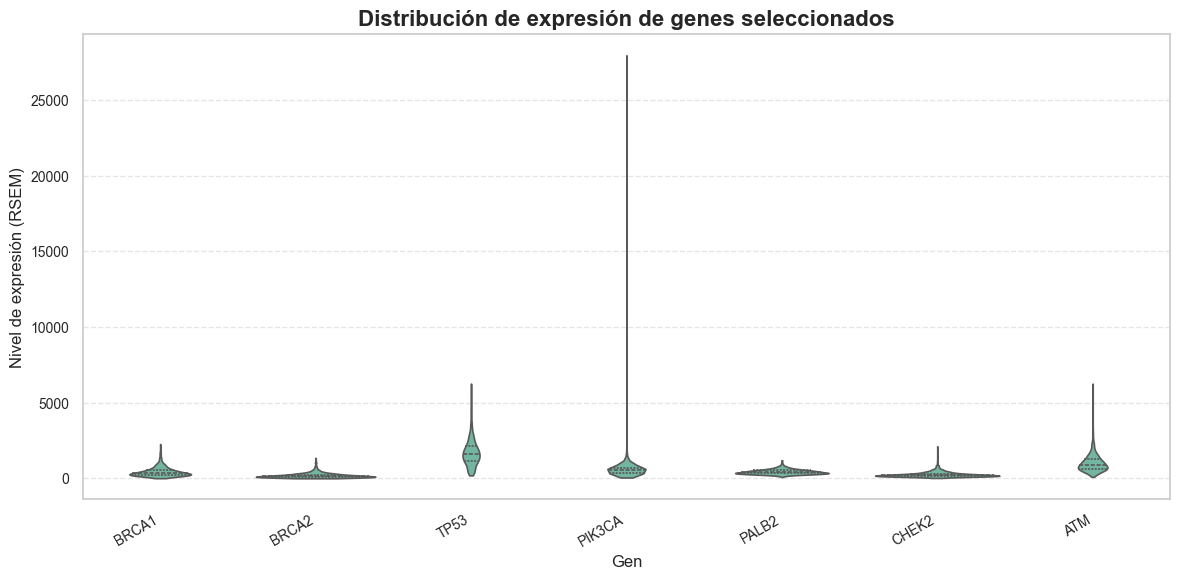

In [12]:
#https://www.cancer.gov/espanol/cancer/causas-prevencion/genetica/hoja-informativa-brca
#http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0120-55522018000300766
#https://genotipia.com/genetica_medica_news/nuevos-genes-cancer-de-mama/
relevant_genes = ["BRCA1", "BRCA2", "TP53", "PIK3CA", "PALB2", "CHEK2", "ATM"]

sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Crear la figura
df_long = genic_expression_df[relevant_genes].melt(var_name="Gen", value_name="Expresión")

# Boxplot con Seaborn (más estilizado)
# Crear gráfico
plt.figure(figsize=(12, 6))
sns.violinplot(x="Gen", y="Expresión", data=df_long, inner="quartile", linewidth=1.2, cut=0)

# Opciones estéticas
plt.title("Distribución de expresión de genes seleccionados", fontsize=16, fontweight='bold')
plt.ylabel("Nivel de expresión (RSEM)", fontsize=12)
plt.xlabel("Gen", fontsize=12)
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar
plt.tight_layout()
plt.show()

In [ ]:
df_lon

Gen  Expresión
0     BRCA1    831.317
1     BRCA1    389.886
2     BRCA1    200.363
3     BRCA1    148.118
4     BRCA1    375.745
...     ...        ...
7569    ATM    522.908
7570    ATM   1683.460
7571    ATM   1061.410
7572    ATM    408.565
7573    ATM    286.733

[7574 rows x 2 columns]

In [15]:
clinical_data_sample_df["ONCOTREE_CODE"].value_counts()

ONCOTREE_CODE
IDC       780
ILC       201
BRCNOS     77
IMMC       17
MBC         8
BRCA        1
Name: count, dtype: int64